In [ ]:
#hide
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
#hide
from misas.core import *

# Model Interpretation through Sensitivity Analysis for Segmentation

> Interpret and explain your segmetation models through analysing their sensitivity to defined alterations of the input

Input alterations currently include:
 - rotation
 - cropping

## Install

`pip install misas`

## How to use

Example with kaggle data

In [ ]:
from fastai.vision import *

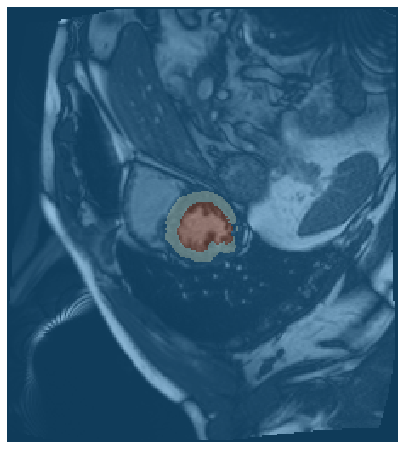

In [ ]:
img = lambda: open_image("example/kaggle/images/1-frame014-slice005.png")
trueMask = lambda: open_mask("example/kaggle/masks/1-frame014-slice005.png")
trainedModel = load_learner(path="example/kaggle", file="model.pkl", tfm_y=False)
resize256 = lambda image: image.resize(256)
img().show(y=trueMask(), figsize=(8,8))

### Rotation

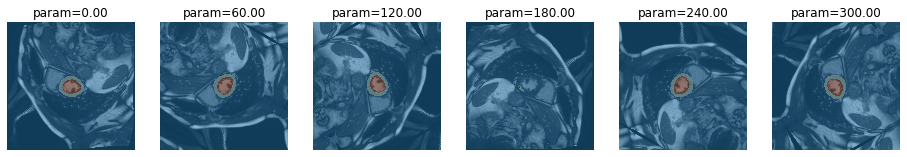

In [ ]:
plot_series(get_rotation_series(img(), trainedModel, prep_function=resize256))

[0, 360, 0, 1]

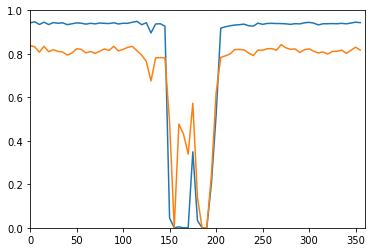

In [ ]:
results = eval_rotation_series(img(), trueMask(), trainedModel, prep_function=resize256)
plt.plot(results['deg'], results['c1'])
plt.plot(results['deg'], results['c2'])
plt.axis([0,360,0,1])

You can use interactive elements to manually explore the impact of rotation

In [ ]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [ ]:
rotation_series = get_rotation_series(img(),trainedModel,prep_function=resize256,step=10)

In [ ]:
def plot_rotation_frame(deg):
    return plot_frame(*rotation_series[int(deg/10)], figsize=(10,10))

In [ ]:
interact(
    plot_rotation_frame,
    deg=widgets.IntSlider(min=0, max=360, step=10, value=90, continuous_update=False)
)

interactive(children=(IntSlider(value=90, continuous_update=False, description='deg', max=360, step=10), Outpu…

<function __main__.plot_rotation_frame(deg)>

There are lots of other transformations to try (e.g. cropping, brightness, contrast, ...). For a complete list see the local_interpret documentation.